In [46]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as pt
from tensorflow.keras.datasets.mnist import load_data


In [47]:
(x_train, y_train), (x_test, y_test) = load_data()

n_train = len(x_train)
n_test = len(x_test)

print(f"Length of test dataset: {n_test}")
print(f"Length of train dataset: {n_train}")

Length of test dataset: 10000
Length of train dataset: 60000


### Lets take a look at one of these images

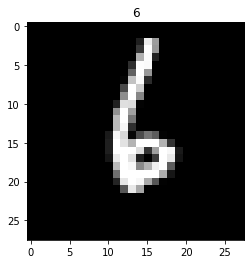

In [48]:
rand: int = int(np.random.randn()*n_test)
pt.imshow(x_train[rand].reshape(28, 28), cmap='gray')
pt.title(y_train[rand])
pt.show()

In [49]:
rand_perm = np.random.permutation(n_train)
x_train = x_train[rand_perm]
y_train = y_train[rand_perm]

y_train = tf.one_hot(y_train, depth=10, on_value=1, off_value=0)
y_test = tf.one_hot(y_test, depth=10, on_value=1, off_value=0)

x_train = x_train[..., np.newaxis]
x_test = x_test[...,np.newaxis]

X = x_train[:45000]
y = y_train[:45000]

x_val = x_train[45000:]
y_val = y_train[45000:]


### Ok, so most ( really all ) of the data processing is done so lets just get right into the learning!

### So up first lets go with a conventional Deep Convolutional Neural Network
- Note, we can't go too deep or we will reach the vanishing gradient problem
- We can also theoretically do data augmentation, but we will do that later and compare and contrast
- We will also start off guns blazing with the normalization and pooling

#### Architecture
    - Conv Input
    - Batch Normalization
    - Activation 
    - Max Pooling
---
    - Conv Input
    - Batch Normalization
    - Activation
    - Max Pooling
---
    - Conv Input
    - Batch Normalization
    - Activation
    - Max Pooling
---
    - Conv Input
    - Batch Normalization
    - Activation
<!--     - Max Pooling -->
---
    - Conv Input
    - Batch Normalization
    - Activation
    - Average Pooling
    - Flatten
---
    - Dense Layer
    - ReLU
---
    - Dropout 
    - Dense Layer
    - Softmax

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import activations as act

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(10, (5, 5), input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation(act.relu))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (5, 5), padding='same')) # zero padding
model.add(layers.BatchNormalization())
model.add(layers.Activation(act.relu))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (5, 5), padding='same')) # zero padding
model.add(layers.BatchNormalization())
model.add(layers.Activation(act.relu))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (5, 5), padding='same')) # zero padding
model.add(layers.BatchNormalization())
model.add(layers.Activation(act.relu))
model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(30))
model.add(layers.Activation(act.relu))

model.add(layers.Dropout(0.25))

model.add(layers.Dense(30))
model.add(layers.Activation(act.relu))

model.add(layers.Dropout(0.3))

model.add(layers.Dense(10))
model.add(layers.Activation(act.softmax))

In [20]:
model.compile(tf.keras.optimizers.RMSprop(lr=0.0001),
                loss='categorical_crossentropy',
                 metrics=['accuracy']) 
# we have an extremely balanced dataset so classification accuracy is valid

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 10)        260       
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
activation_20 (Activation)   (None, 24, 24, 10)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 10)        2510      
_________________________________________________________________
batch_normalization_13 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
activation_21 (Activation)   (None, 12, 12, 10)       

In [22]:
history = model.fit(X, y, 
         batch_size=64,
         epochs=50,
         validation_data=(x_val, y_val))

Epoch 1/50
625/625 [==============================] - 4s 5ms/step - loss: 2.1834 - accuracy: 0.1878 - val_loss: 1.5925 - val_accuracy: 0.6487
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 1.5599 - accuracy: 0.4817 - val_loss: 0.8815 - val_accuracy: 0.8482
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 1.0411 - accuracy: 0.6771 - val_loss: 0.4894 - val_accuracy: 0.9058
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 0.7254 - accuracy: 0.7783 - val_loss: 0.3092 - val_accuracy: 0.9349
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5461 - accuracy: 0.8341 - val_loss: 0.2240 - val_accuracy: 0.9476
Epoch 6/50
625/625 [==============================] - 3s 5ms/step - loss: 0.4300 - accuracy: 0.8731 - val_loss: 0.1810 - val_accuracy: 0.9540
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.3687 - accuracy: 0.8939 - val_loss: 0.1556 - val_accuracy: 0.9593
Epoch 

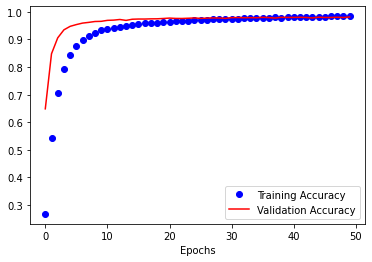

In [23]:
epochs = range(50)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
pt.plot(epochs, train_acc, 'bo', label="Training Accuracy")
pt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
pt.xlabel("Epochs")
pt.ylabel=("Accuracy")
pt.legend()
pt.show()

### As we can see above, our training accuracy and validation accuracy followed eachother closely up until the end. This is indicative of underfitting. I think we can fix that!
### Our accuracy was 98.15%

In [3]:
from tensorflow.keras.layers import LeakyReLU

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(10, (5, 5), input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (5, 5), padding='same')) # zero padding
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (5, 5), padding='same')) # zero padding
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())
# model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(30))
model.add(layers.LeakyReLU())

model.add(layers.Dropout(0.25))

model.add(layers.Dense(30))
model.add(layers.LeakyReLU())

model.add(layers.Dropout(0.66))

model.add(layers.Dense(10))
model.add(layers.Activation(act.softmax))

In [49]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 24, 24, 10)        260       
_________________________________________________________________
batch_normalization_38 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 24, 24, 10)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 12, 12, 10)        2510      
_________________________________________________________________
batch_normalization_39 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 12, 12, 10)      

In [50]:
model.compile(tf.keras.optimizers.RMSprop(lr=0.0002),
                loss='categorical_crossentropy',
                 metrics=['accuracy']) 
# we have an extremely balanced dataset so classification accuracy is valid

In [51]:
history = model.fit(X, y, 
         batch_size=64,
         epochs=50,
         validation_data=(x_val, y_val))

Epoch 1/50
625/625 [==============================] - 4s 5ms/step - loss: 1.8482 - accuracy: 0.3520 - val_loss: 0.4548 - val_accuracy: 0.9044
Epoch 2/50
625/625 [==============================] - 3s 4ms/step - loss: 0.7865 - accuracy: 0.7439 - val_loss: 0.2175 - val_accuracy: 0.9417
Epoch 3/50
625/625 [==============================] - 3s 4ms/step - loss: 0.5207 - accuracy: 0.8346 - val_loss: 0.1404 - val_accuracy: 0.9578
Epoch 4/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3906 - accuracy: 0.8819 - val_loss: 0.1154 - val_accuracy: 0.9647
Epoch 5/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3256 - accuracy: 0.8985 - val_loss: 0.1074 - val_accuracy: 0.9673
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2906 - accuracy: 0.9119 - val_loss: 0.0929 - val_accuracy: 0.9706
Epoch 7/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2555 - accuracy: 0.9244 - val_loss: 0.0853 - val_accuracy: 0.9734
Epoch 

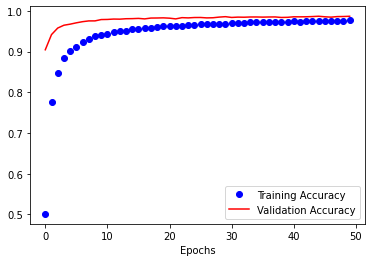

In [52]:
epochs = range(50)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
pt.plot(epochs, train_acc, 'bo', label="Training Accuracy")
pt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
pt.xlabel("Epochs")
pt.ylabel=("Accuracy")
pt.legend()
pt.show()

### Ok, so ensuring that the output filters were larger (6x6), using LeakyReLU, and making the model a little simpler worked! We reached 98.67% accuracy. Lets see if we can get to 99

### Lets see if a more modern architecture can do the job
- Using the keras' functional API lets see if we can implement a 'skip connection' architecture

### Architecture
    - Input
   
---
    - y = Conv2D(10, (5, 5), padding)    |     X
    - BatchNormalization
    - Activation
    - Conv2D(10, (5, 5), padding)
    - BatchNormalization
    - Activation
    - MaxPooling((2, 2), padding)
    
    - Add([x, y])
    
    - Dropout
---




In [4]:
inp = layers.Input(shape=(28, 28, 1))

#--------------------------------------------------------
x = layers.Conv2D(10, (5, 5), padding="same")(inp)
y = layers.BatchNormalization()(x)
y = layers.Activation(layers.LeakyReLU())(y)
y = layers.Conv2D(10, (5, 5), padding='same')(y)
y = layers.BatchNormalization()(y)
y = layers.Activation(act.relu)(y)

x = layers.Add()([x, y])
#--------------------------------------------------------
x = layers.Conv2D(10, (5, 5), padding="same")(x)
y = layers.BatchNormalization()(x)
y = layers.Activation(layers.LeakyReLU())(y)
y = layers.Conv2D(10, (5, 5), padding='same')(y)
y = layers.BatchNormalization()(y)
y = layers.Activation(act.relu)(y)

x = layers.Add()([x, y])
#--------------------------------------------------------
x = layers.Conv2D(10, (5, 5), padding="same")(x)
y = layers.BatchNormalization()(x)
y = layers.Activation(layers.LeakyReLU())(y)
y = layers.Conv2D(10, (5, 5), padding='same')(y)
y = layers.BatchNormalization()(y)
y = layers.Activation(act.relu)(y)

x = layers.Add()([x, y])
#--------------------------------------------------------
x = layers.Conv2D(10, (5, 5), padding="same")(x)
y = layers.BatchNormalization()(x)
y = layers.Activation(layers.LeakyReLU())(y)
y = layers.Conv2D(10, (5, 5), padding='same')(y)
y = layers.BatchNormalization()(y)
y = layers.Activation(act.relu)(y)

x = layers.Add()([x, y])
#--------------------------------------------------------
x = layers.Conv2D(10, (5, 5), padding="same")(x)
y = layers.BatchNormalization()(x)
y = layers.Activation(layers.LeakyReLU())(y)
y = layers.Conv2D(10, (5, 5), padding='same')(y)
y = layers.BatchNormalization()(y)
y = layers.Activation(act.relu)(y)

x = layers.Add()([x, y])
#--------------------------------------------------------
x = layers.Conv2D(10, (5, 5), padding="same")(x)
y = layers.BatchNormalization()(x)
y = layers.Activation(layers.LeakyReLU())(y)
y = layers.Conv2D(10, (5, 5), padding='same')(y)
y = layers.BatchNormalization()(y)
y = layers.Activation(act.relu)(y)

x = layers.Add()([x, y])
#--------------------------------------------------------
x = layers.Conv2D(10, (5, 5), padding="same")(x)
y = layers.BatchNormalization()(x)
y = layers.Activation(layers.LeakyReLU())(y)
y = layers.Conv2D(10, (5, 5), padding='same')(y)
y = layers.BatchNormalization()(y)
y = layers.Activation(act.relu)(y)

x = layers.Add()([x, y])
#--------------------------------------------------------
x = layers.Conv2D(10, (5, 5), padding="same")(x)
y = layers.BatchNormalization()(x)
y = layers.Activation(layers.LeakyReLU())(y)
y = layers.Conv2D(10, (5, 5), padding='same')(y)
y = layers.BatchNormalization()(y)
y = layers.Activation(act.relu)(y)

x = layers.Add()([x, y])
#--------------------------------------------------------

x = layers.AveragePooling2D((2, 2))(x)

z = layers.Dropout(0.25)(x)

z = layers.Flatten()(z)
z = layers.Dense(30)(z)
z = layers.Activation(act.relu)(z)

z = layers.Dense(10)(z)
z = layers.Activation(act.softmax)(z)

In [5]:
model = tf.keras.models.Model(inputs=inp, outputs=z)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 28, 28, 10)   260         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 28, 28, 10)   40          conv2d_7[0][0]                   
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 28, 28, 10)   0           batch_normalization_7[0][0]      
______________________________________________________________________________________________

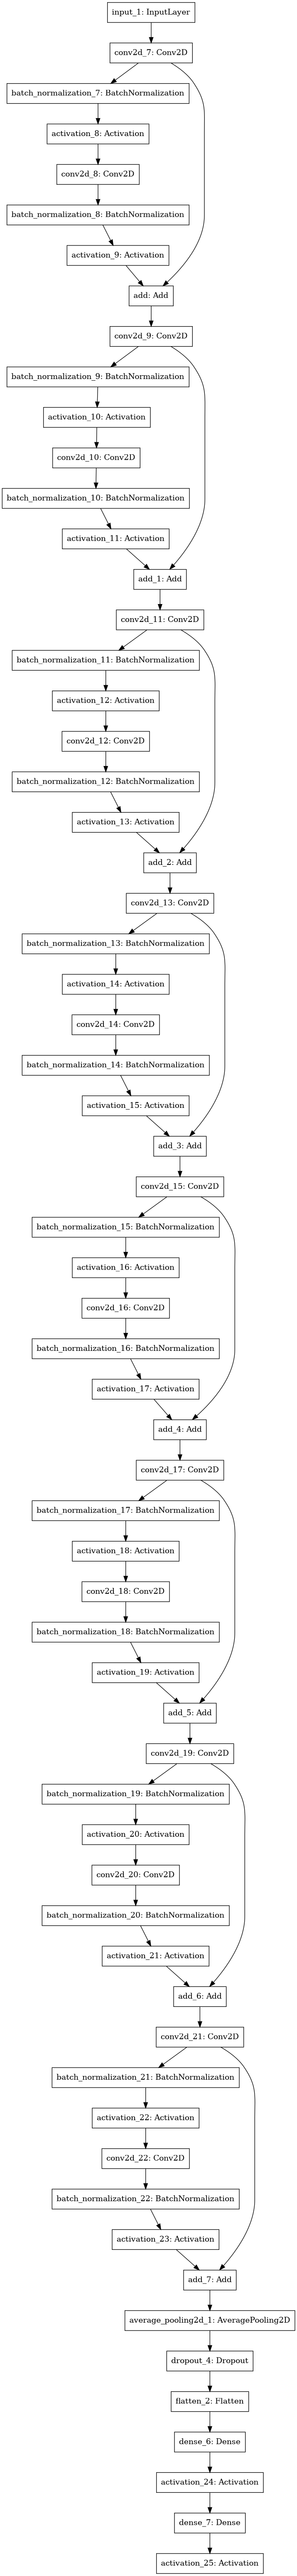

In [7]:
tf.keras.utils.plot_model(model, to_file="skip_connection_graph.png")

In [54]:
model.compile(tf.keras.optimizers.RMSprop(lr=0.00016),
                loss='categorical_crossentropy',
                 metrics=['accuracy']) 
# we have an extremely balanced dataset so classification accuracy is valid

In [55]:
history = model.fit(X, y, 
         batch_size=32,
         epochs=3,
         validation_data=(x_val, y_val))

Epoch 1/3
1407/1407 [==============================] - 20s 13ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0238 - val_accuracy: 0.9955
Epoch 2/3
1407/1407 [==============================] - 17s 12ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0262 - val_accuracy: 0.9956
Epoch 3/3
1407/1407 [==============================] - 18s 12ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0169 - val_accuracy: 0.9961


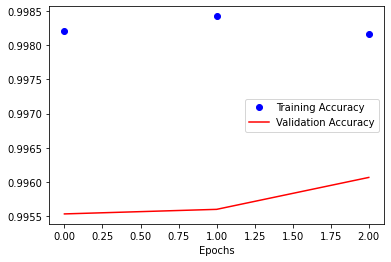

In [57]:
epochs = range(3)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
pt.plot(epochs, train_acc, 'bo', label="Training Accuracy")
pt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
pt.xlabel("Epochs")
pt.ylabel=("Accuracy")
pt.legend()
pt.show()

In [58]:
result = model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.0621 - accuracy: 0.9909


In [63]:
print(f"Testing accuracy: {result[1] * 100}%")

Testing accuracy: 99.08999800682068%


### Woo!!!   We managed to not only get a validation accuracy of over 99.61%
## We got a Testing Accuracy of 99.0899%!!!

- This result was achieved with little parameter tuning
- Let's